# Sentiment Analysis

In [11]:
import pandas as pd
import numpy as np 
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt

In [12]:
df= pd.read_csv(r"C:\Users\ranji\OneDrive\Documents\vs codes\.vscode\PRODIGY_DS_04\twitter_training.csv", engine='python')
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


since we don't have column names we are creating column names and loading the data. 

In [14]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv(r"C:\Users\ranji\OneDrive\Documents\vs codes\.vscode\PRODIGY_DS_04\twitter_training.csv", engine='python', names=col_names)
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


The columns are:

ID: Unique identifier for each entry

Entity: Entity or brand mentioned in social media content

Sentiment: Sentiment labels (e.g., Positive, Negative, Neutral)

Content: Text content of social media posts

In [16]:
df.shape

(74682, 4)

In [17]:
df.dtypes

ID            int64
Entity       object
Sentiment    object
Content      object
dtype: object

In [18]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [19]:
df.dropna(subset = ['Content'],inplace=True)

In [20]:
total_duplicates = df[df.duplicated(keep='first')].shape[0]

print("Total duplicate rows:", total_duplicates)

Total duplicate rows: 2340


In [21]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [22]:
df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')

In [23]:
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

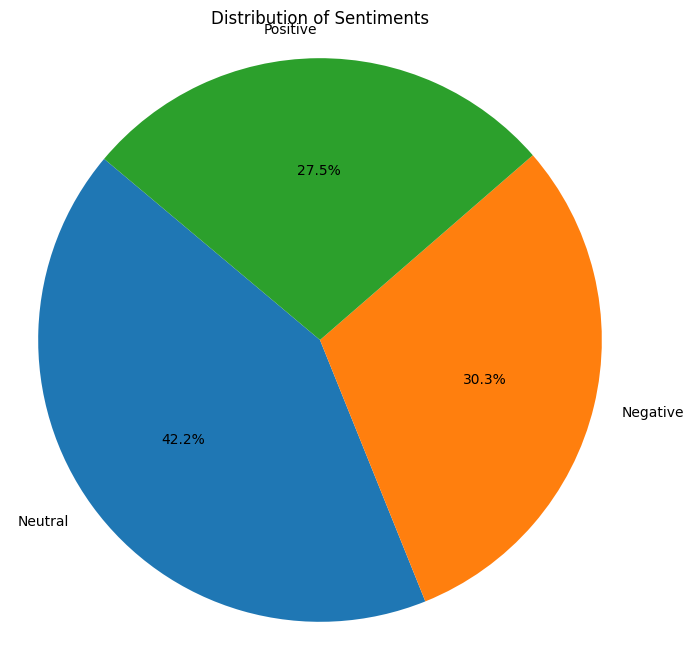

In [24]:
sentiment_distribution = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal') 

plt.show()

Neutral Sentiment: Approximately 42.2% of sentiments are neutral.

Negative Sentiment: About 30.3% of sentiments are negative.

Positive Sentiment: Around 27.5% of sentiments are positive.

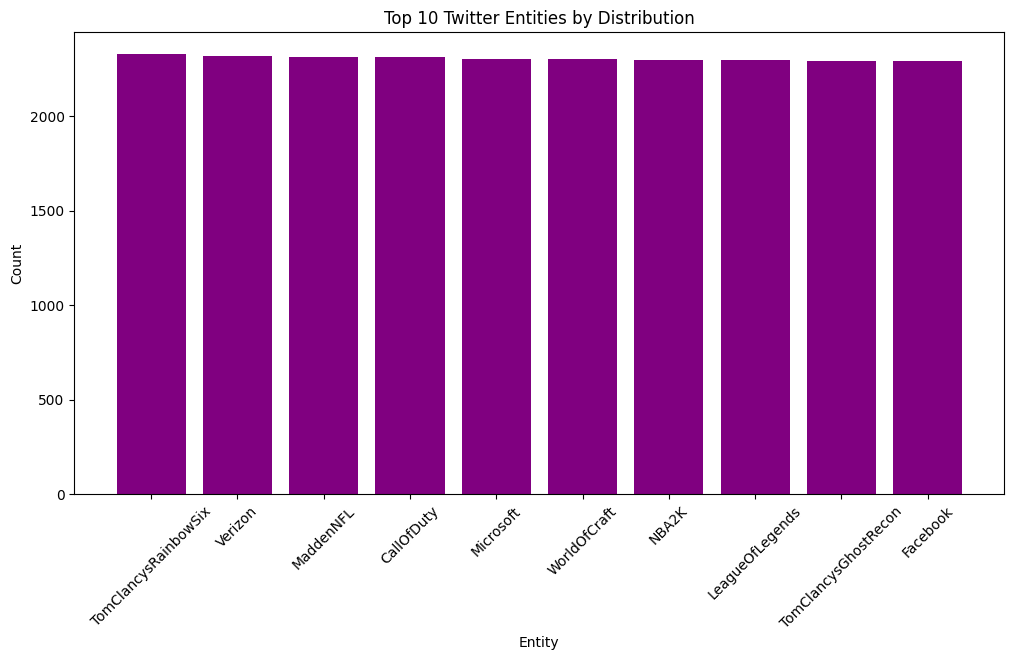

In [25]:
entity_distribution = df['Entity'].value_counts()
top_10_entities = entity_distribution.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_entities.index, top_10_entities.values, color='purple')
plt.title('Top 10 Twitter Entities by Distribution')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

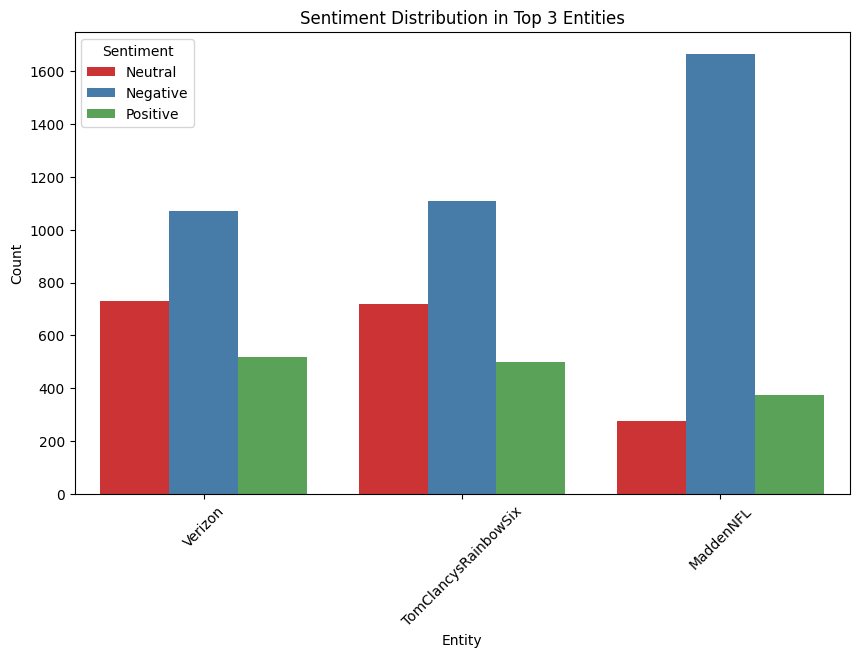

In [26]:
entity_distribution = df['Entity'].value_counts()
top_3_entities = entity_distribution.head(3).index
df_top_3 = df[df['Entity'].isin(top_3_entities)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_3, x='Entity', hue='Sentiment', palette='Set1')
plt.title('Sentiment Distribution in Top 3 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Among the top 3 entities:

MaddenNFL: It has the highest negative sentiment, indicating a notable amount of negative sentiment in conversations related to Madden NFL.

TomClancyRainbowSix: Followed by Tom Clancy's Rainbow Six, which also experiences a significant negative sentiment.

Verizon: Verizon has the highest neutral sentiment, suggesting a more balanced sentiment distribution.

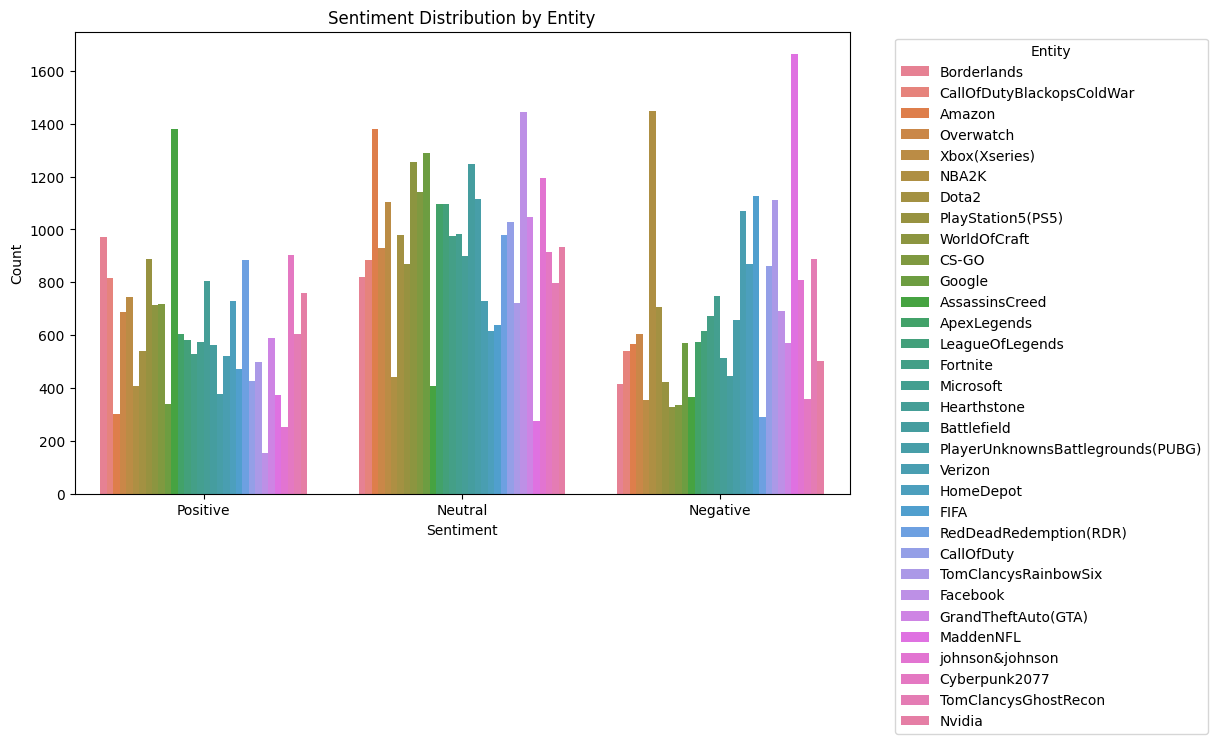

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Entity')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The chart provides a visual overview of how sentiments are distributed among different entities.

It's evident that sentiment distribution varies by entity, with some entities having a more positive or negative sentiment compared to others.

In [28]:
sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)
sentiment_counts

Sentiment,Negative,Neutral,Positive
Entity,,,
Amazon,565,1382,302
ApexLegends,574,1098,606
AssassinsCreed,365,409,1382
Battlefield,445,1249,561
Borderlands,415,819,972
CS-GO,335,1143,717
CallOfDuty,861,1027,426
CallOfDutyBlackopsColdWar,540,885,817
Cyberpunk2077,360,913,902


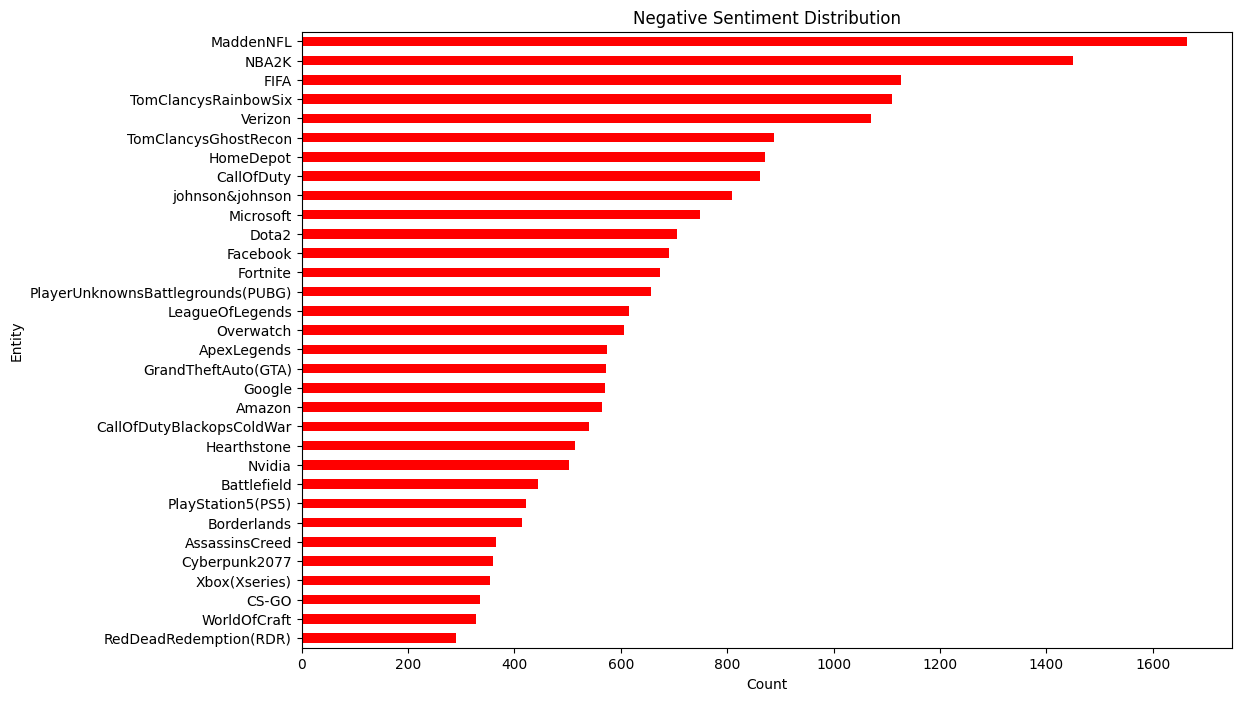

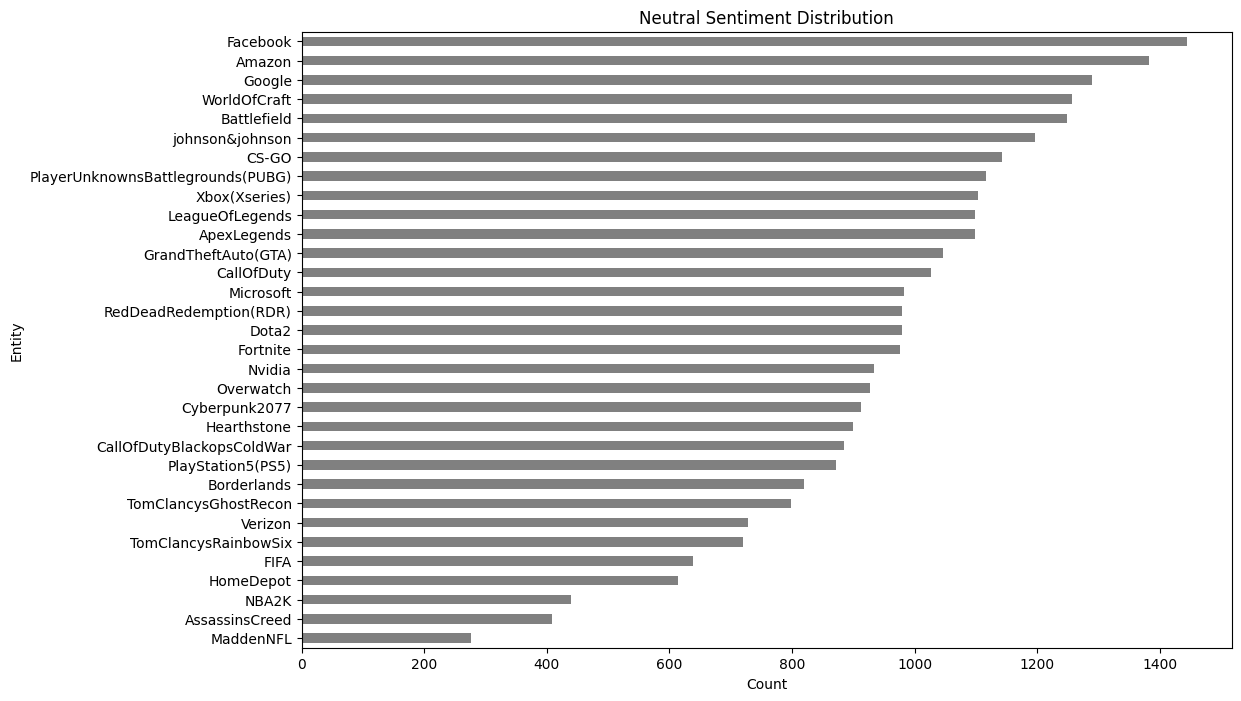

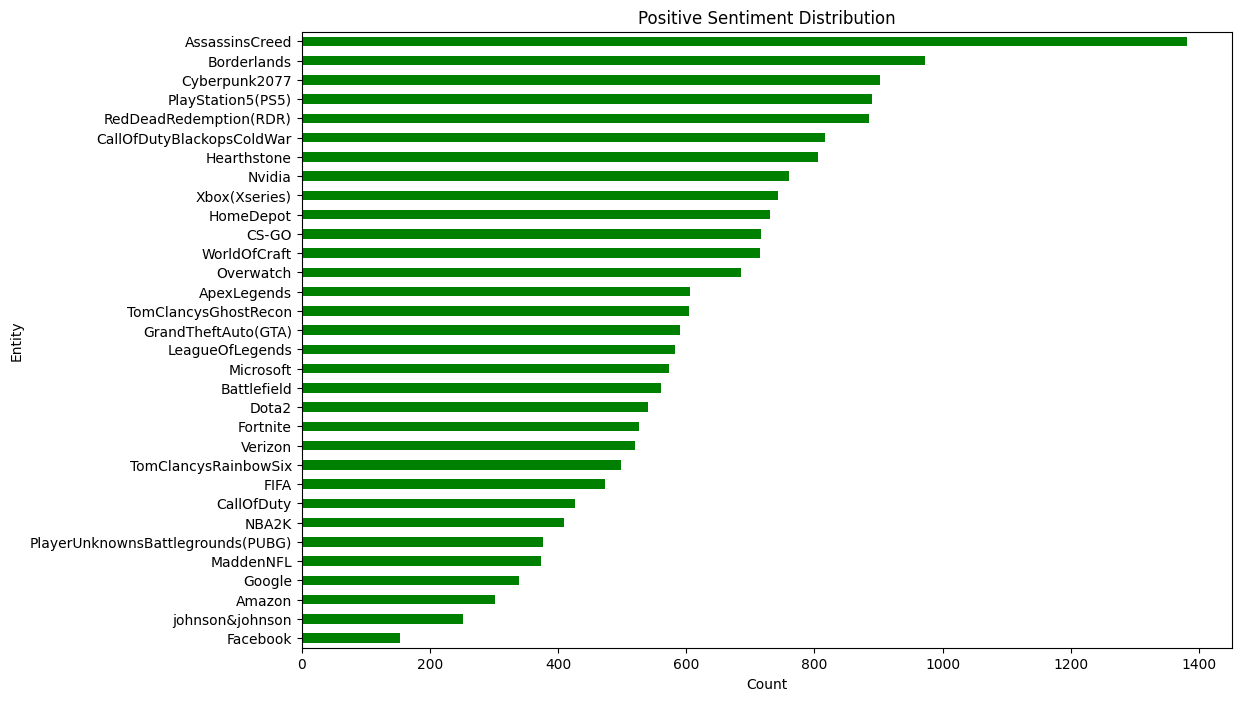

In [29]:
for sentiment in ['Negative', 'Neutral', 'Positive']:
    plt.figure(figsize=(12, 8))
    sentiment_counts[sentiment].sort_values().plot(kind='barh', color={'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'}[sentiment])
    plt.title(f'{sentiment} Sentiment Distribution')
    plt.xlabel('Count')
    plt.ylabel('Entity')
    plt.show()

ranjith is a cool guy


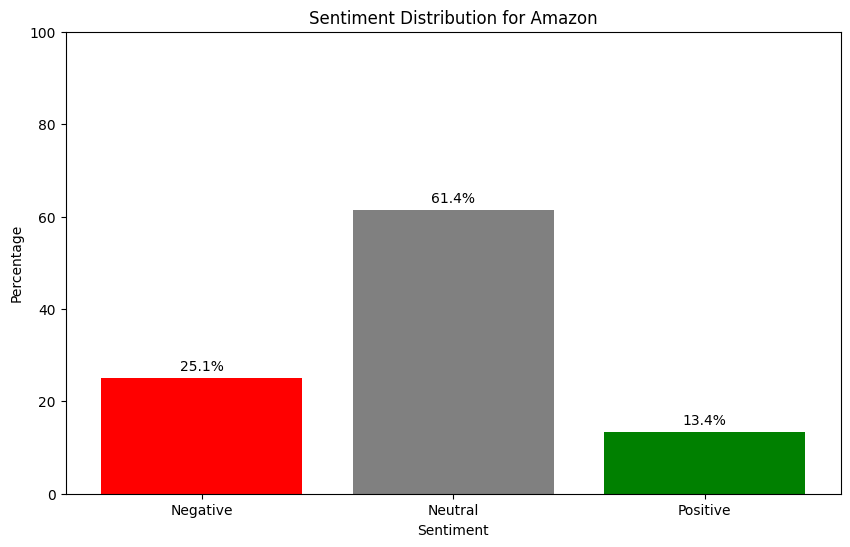

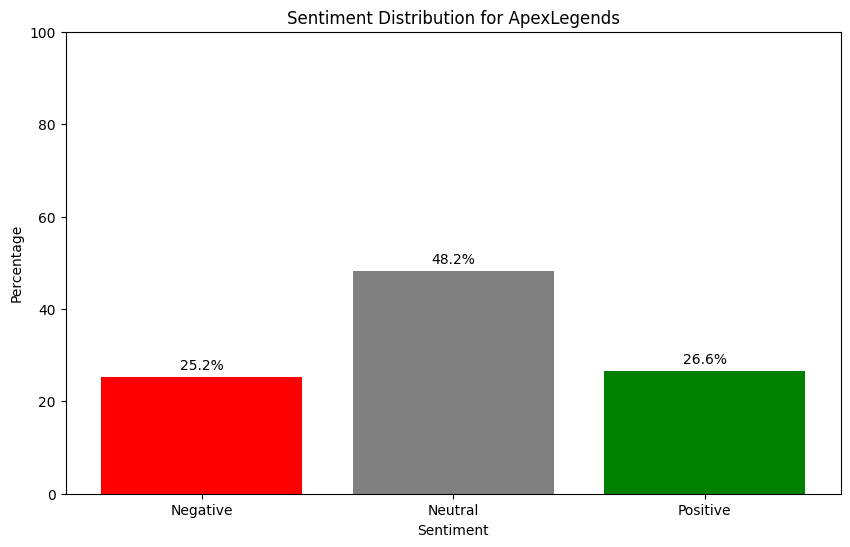

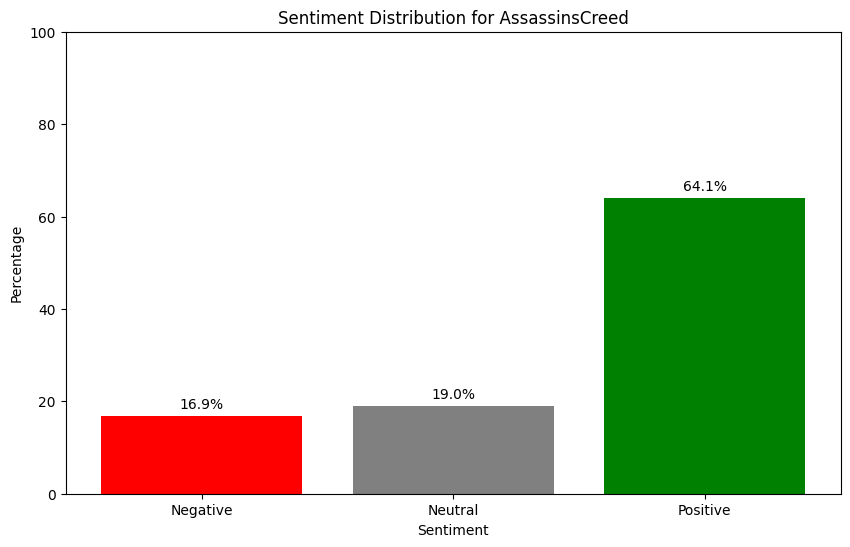

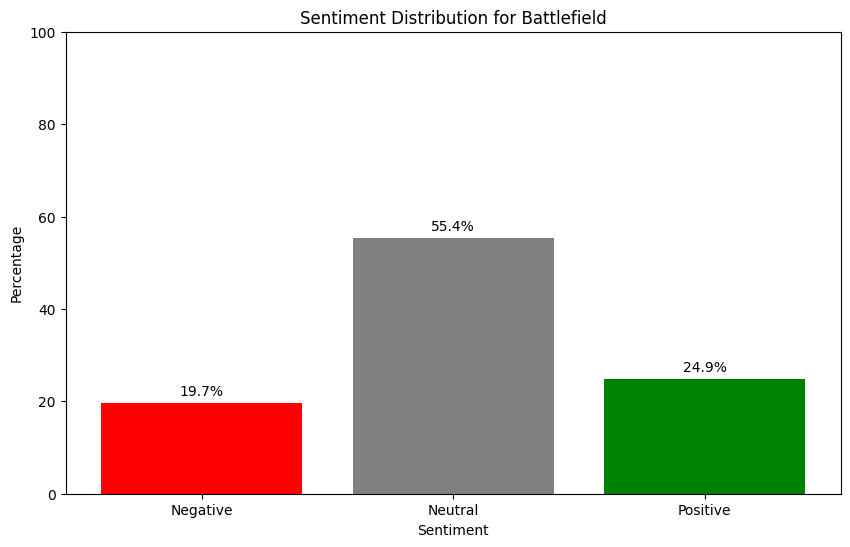

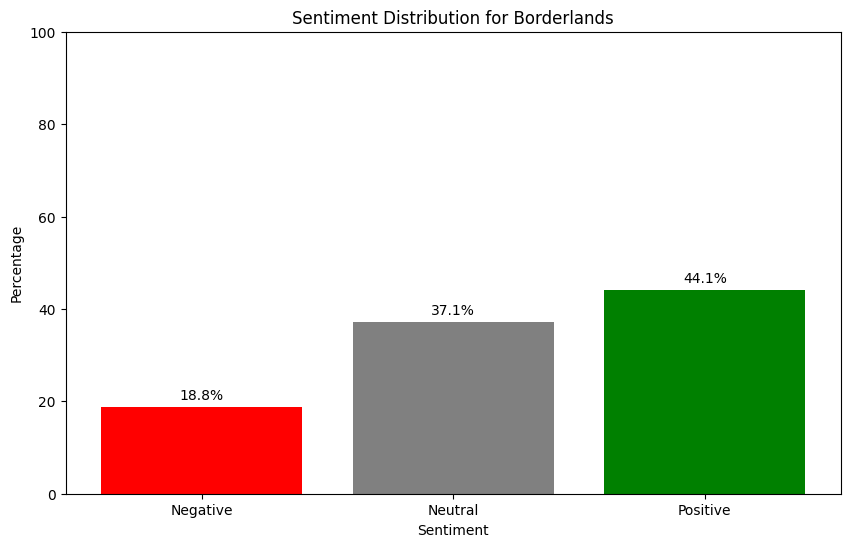

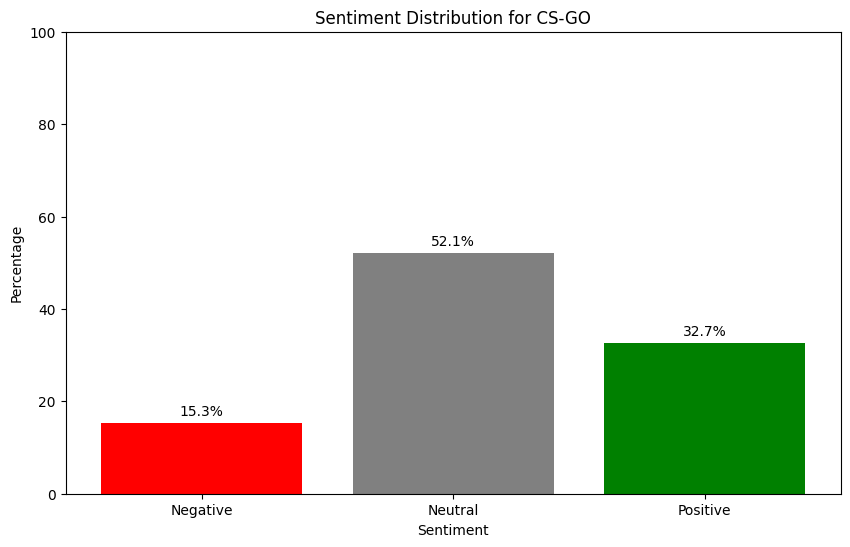

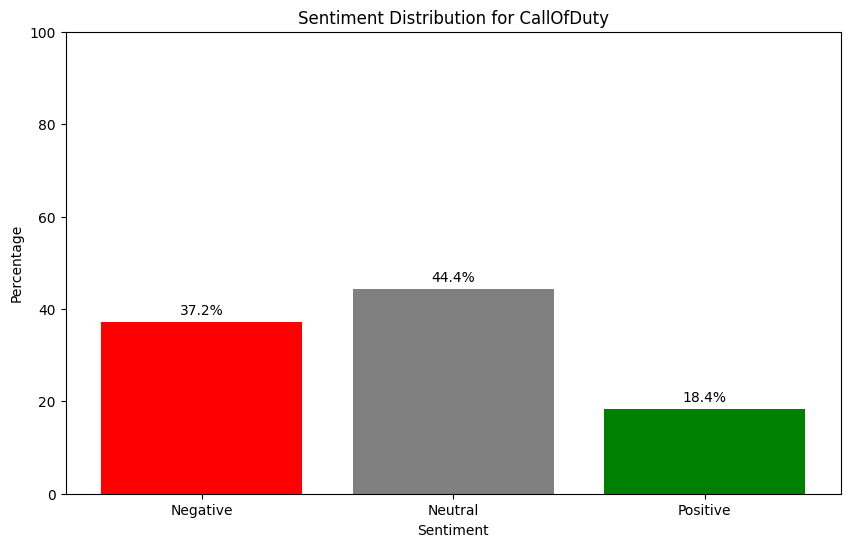

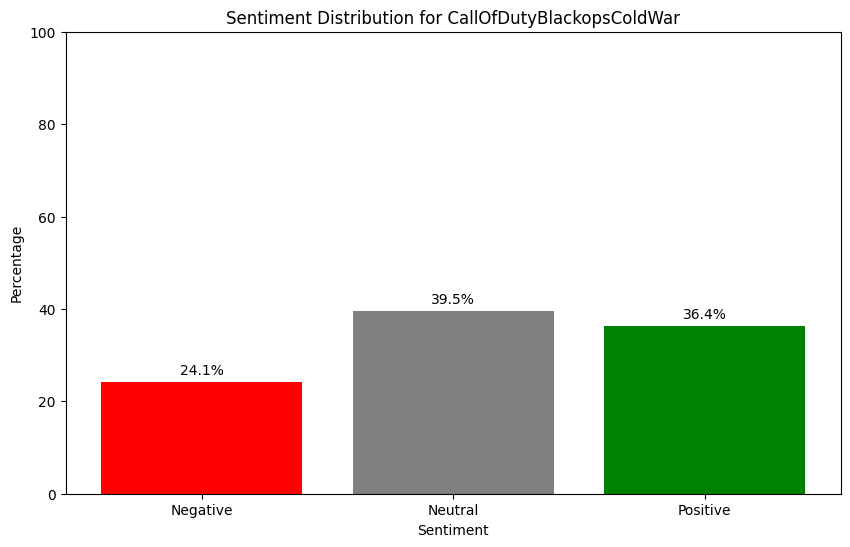

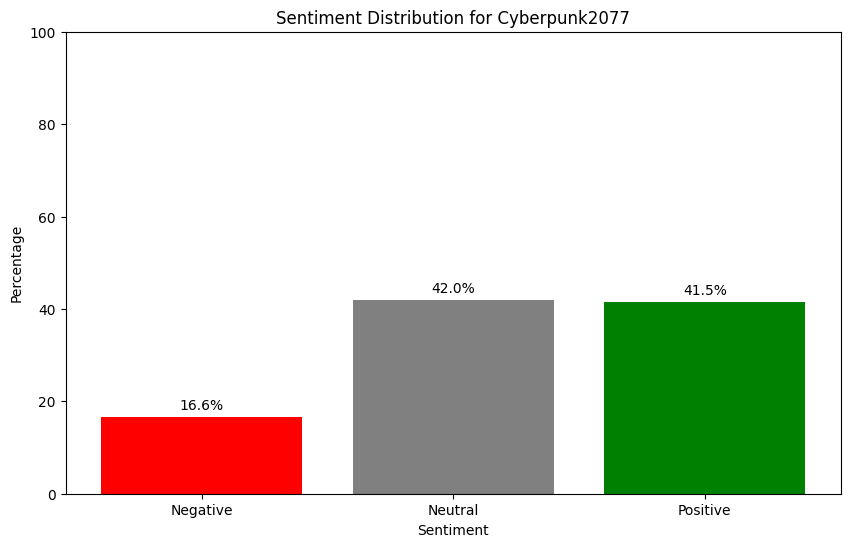

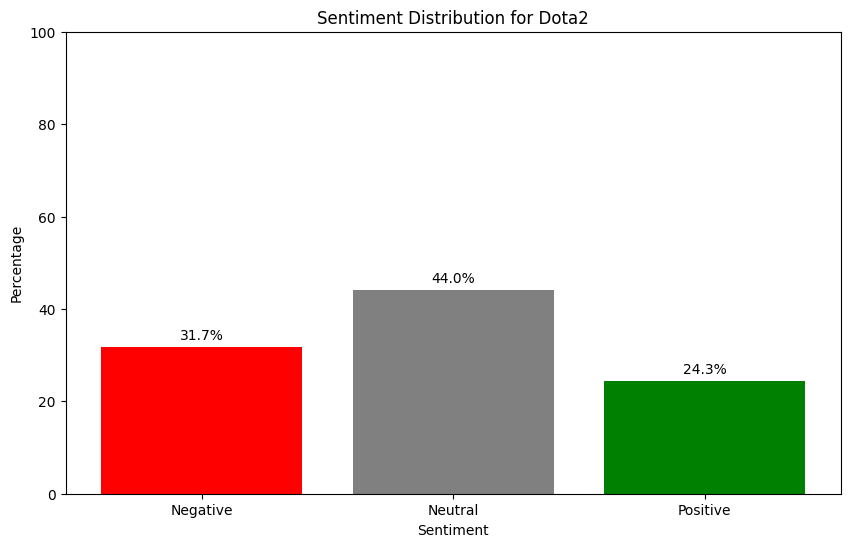

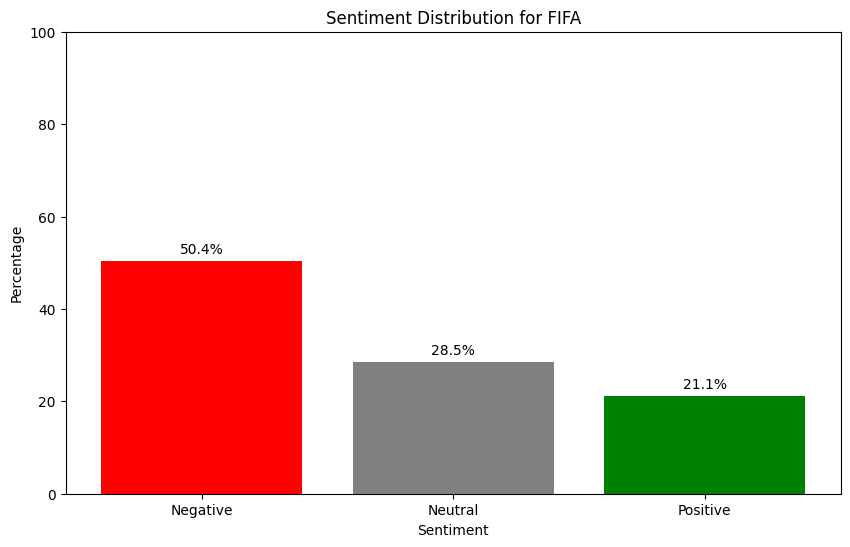

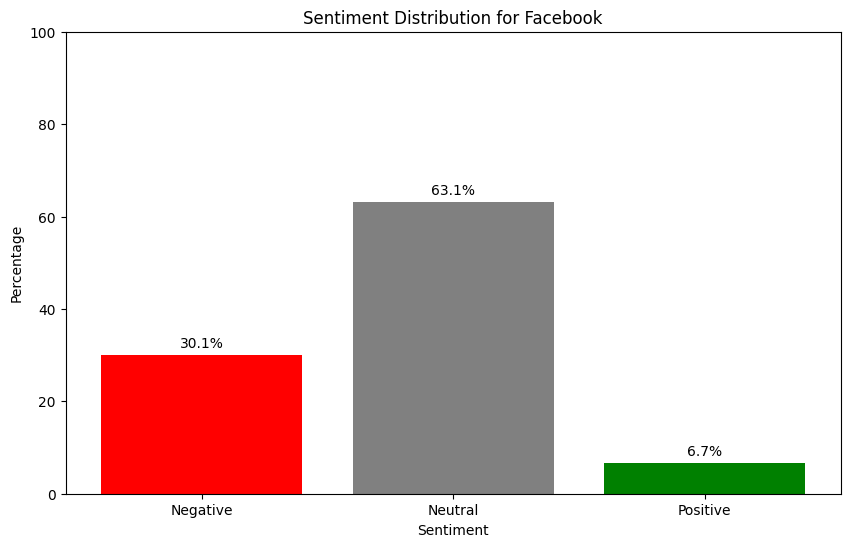

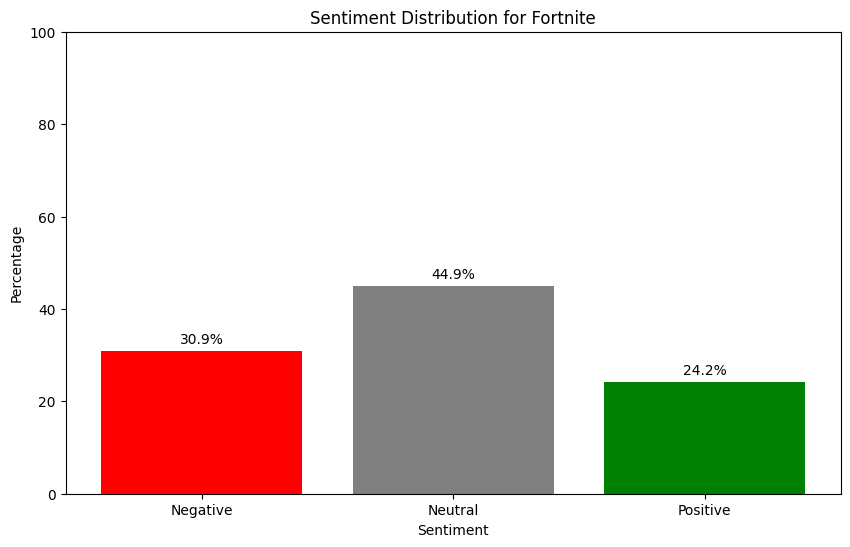

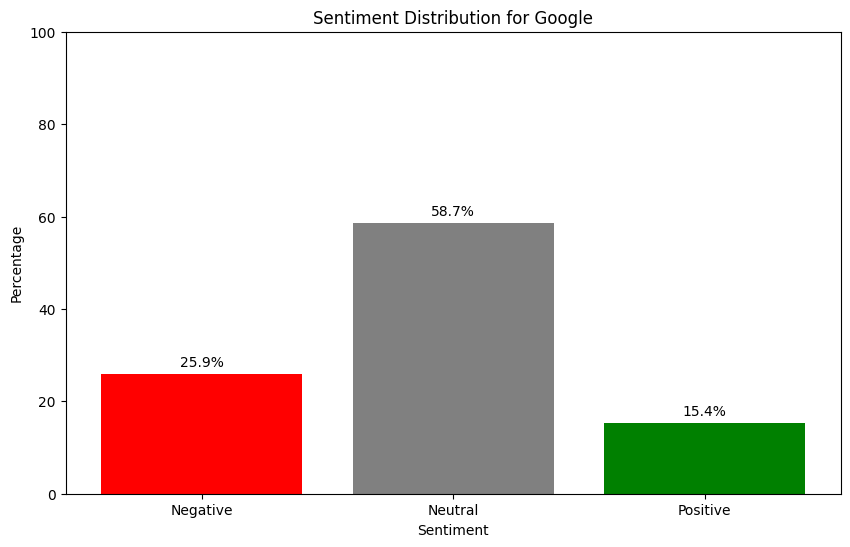

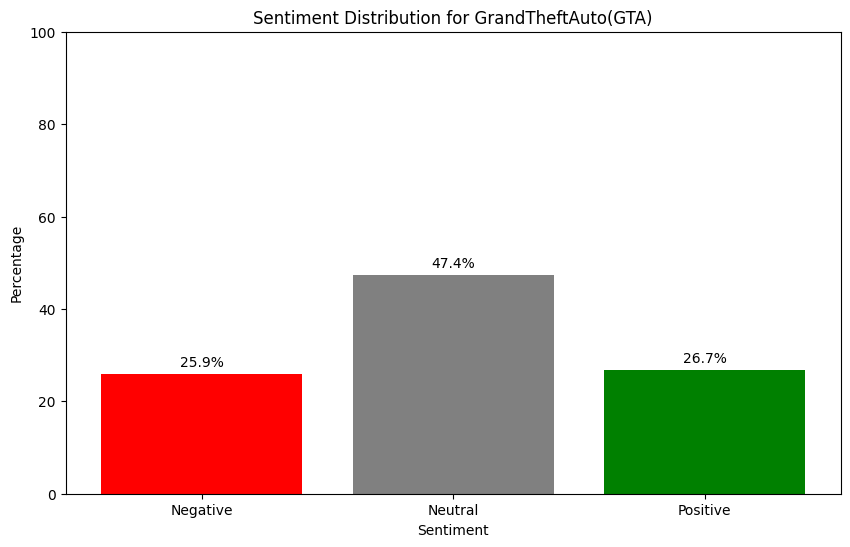

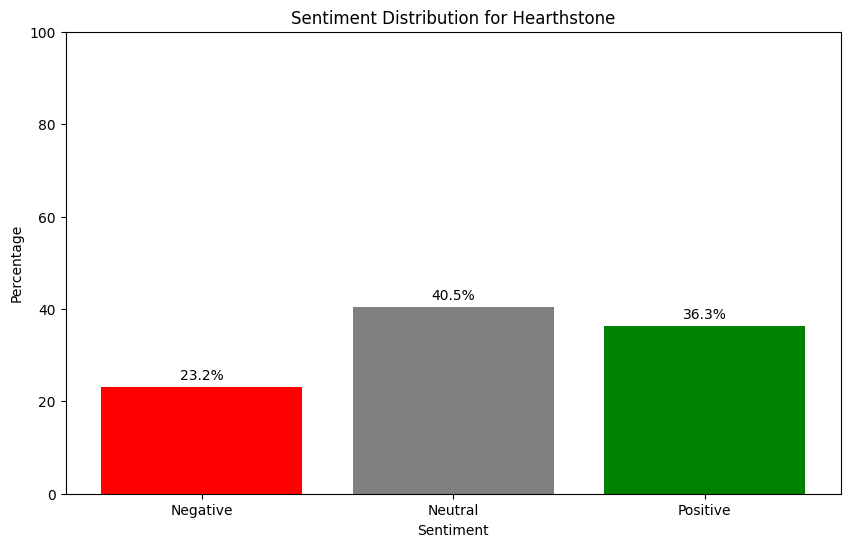

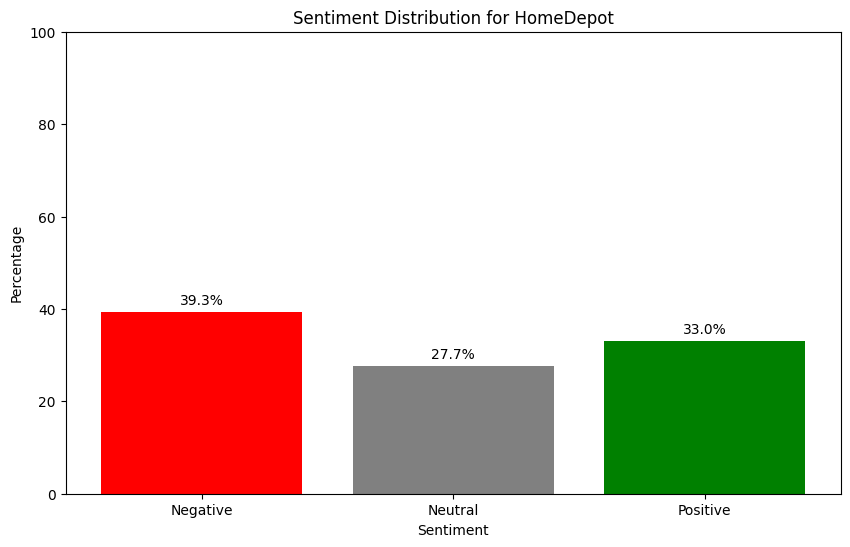

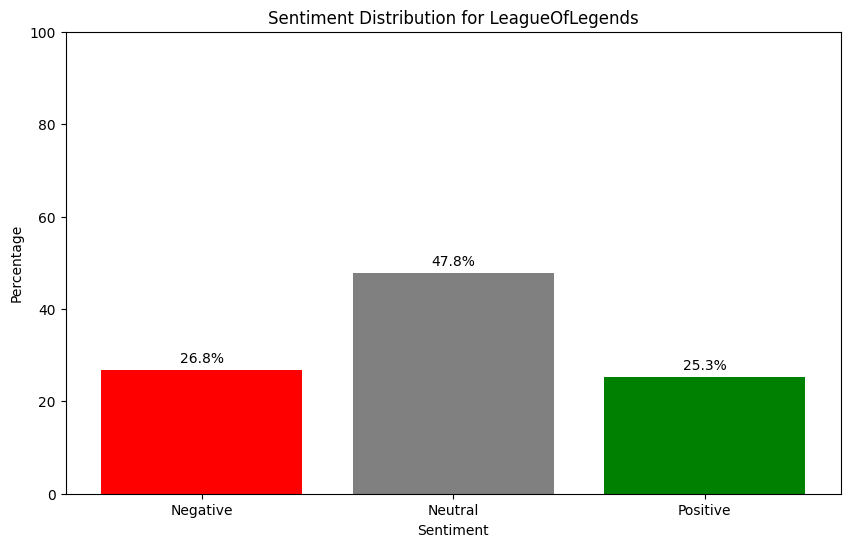

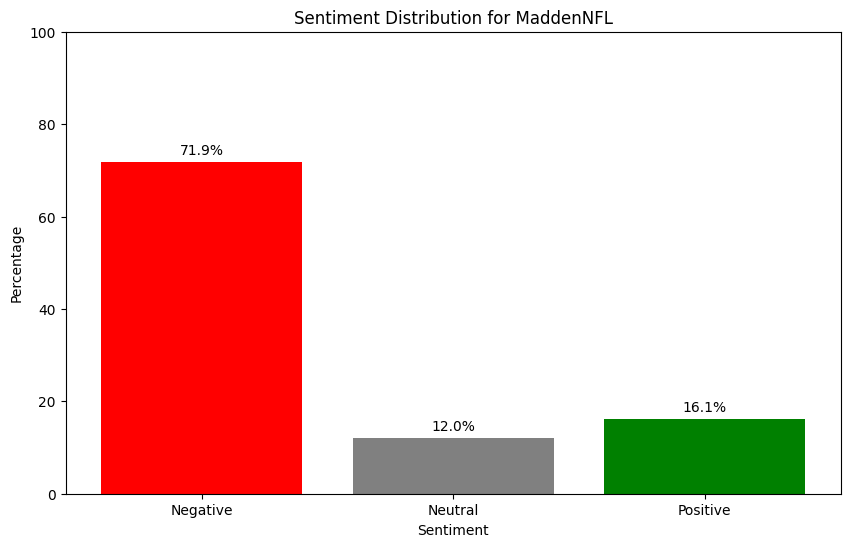

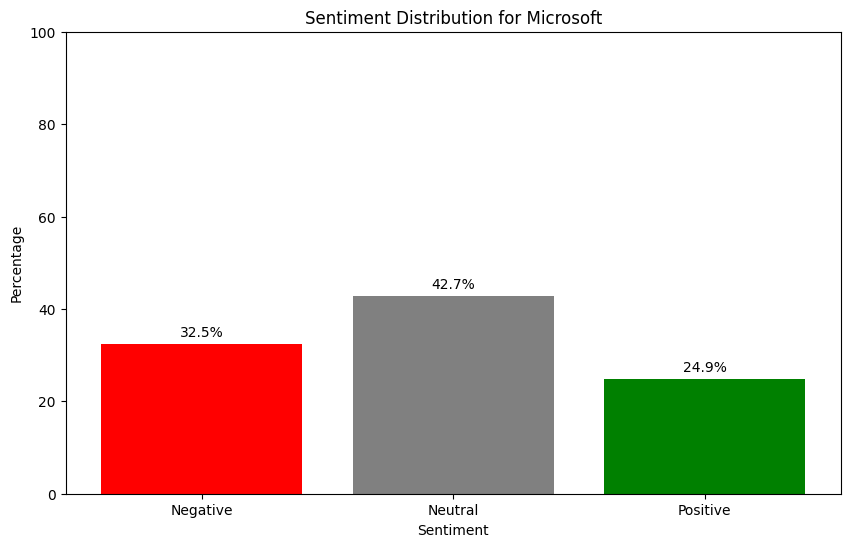

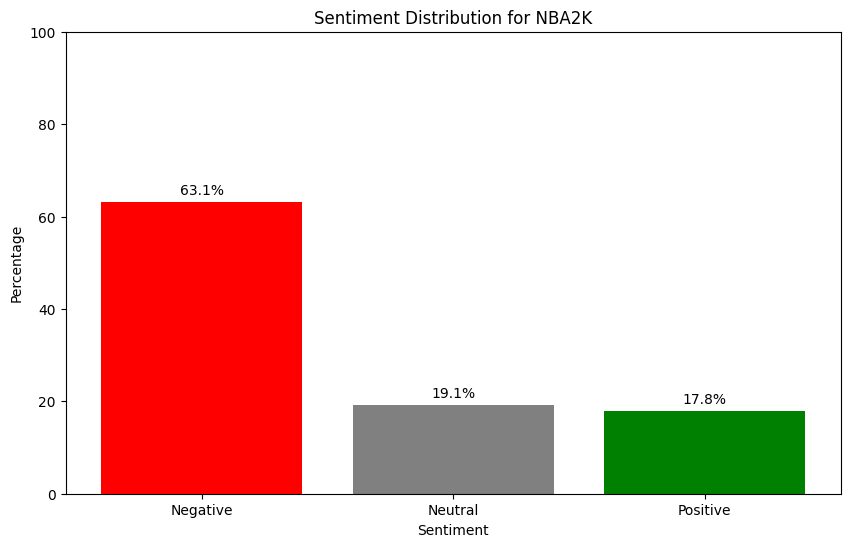

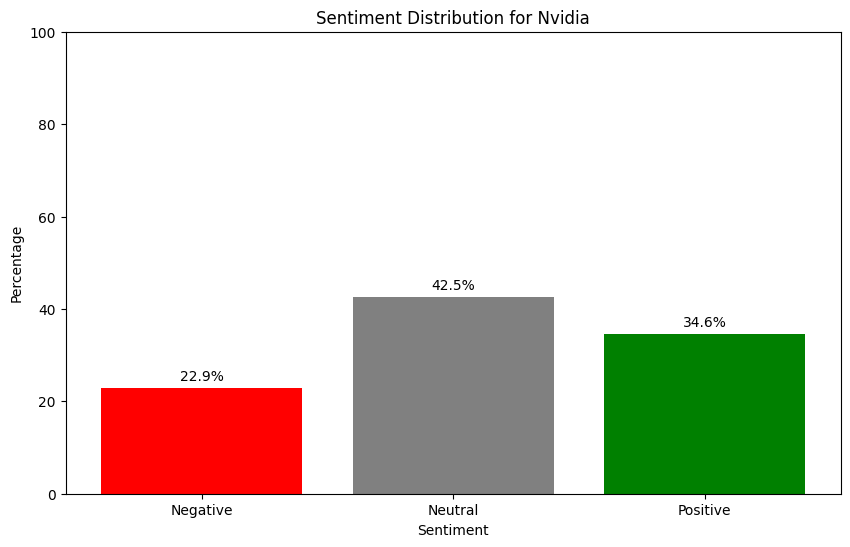

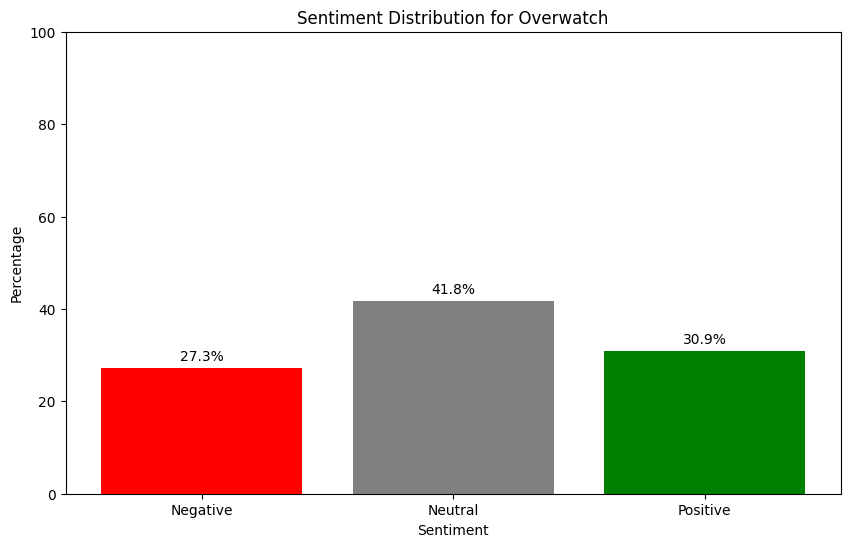

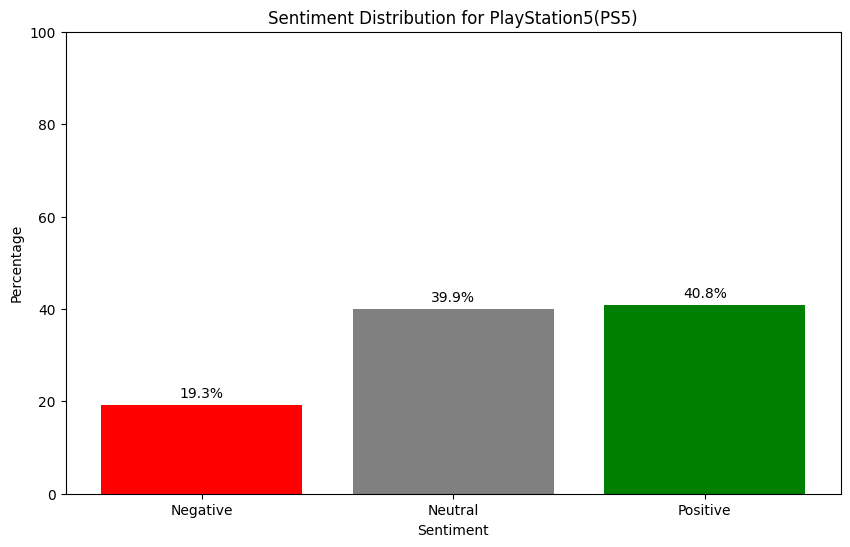

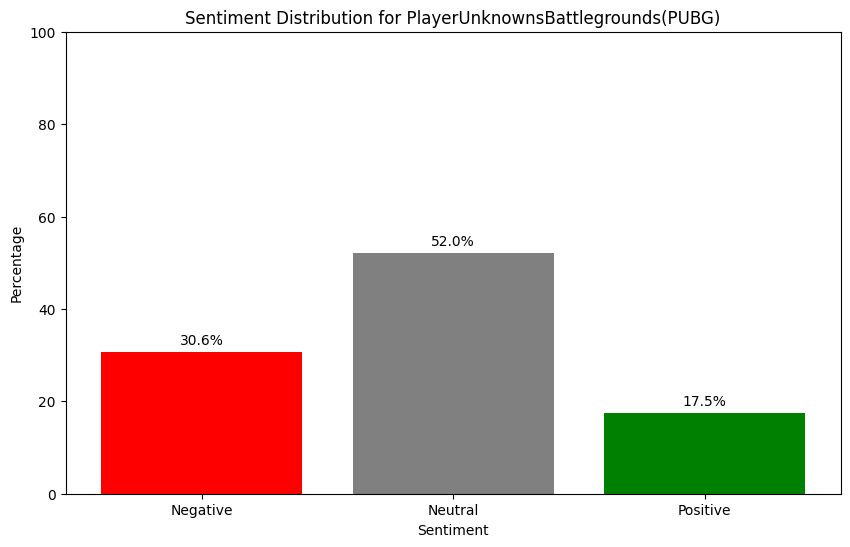

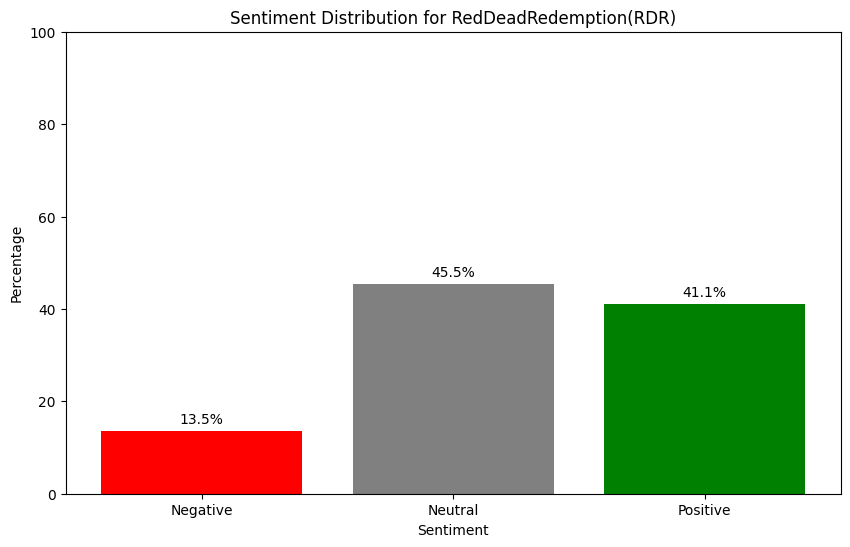

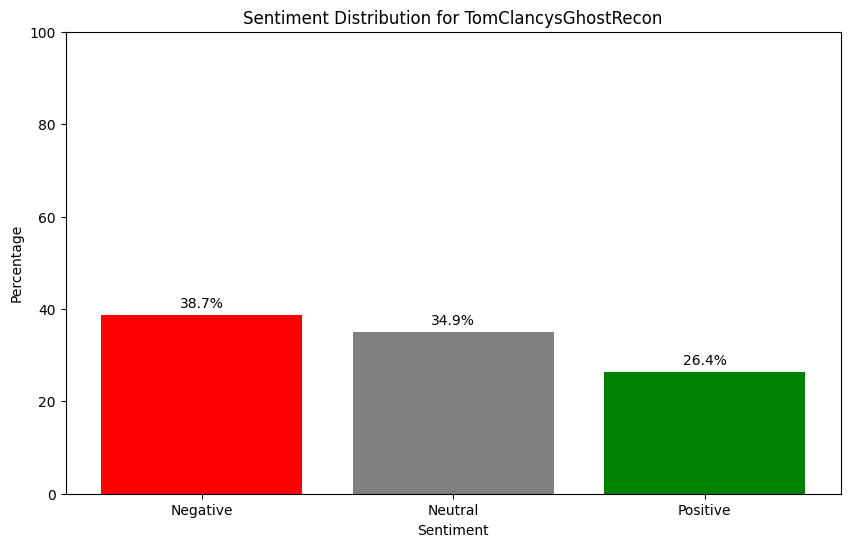

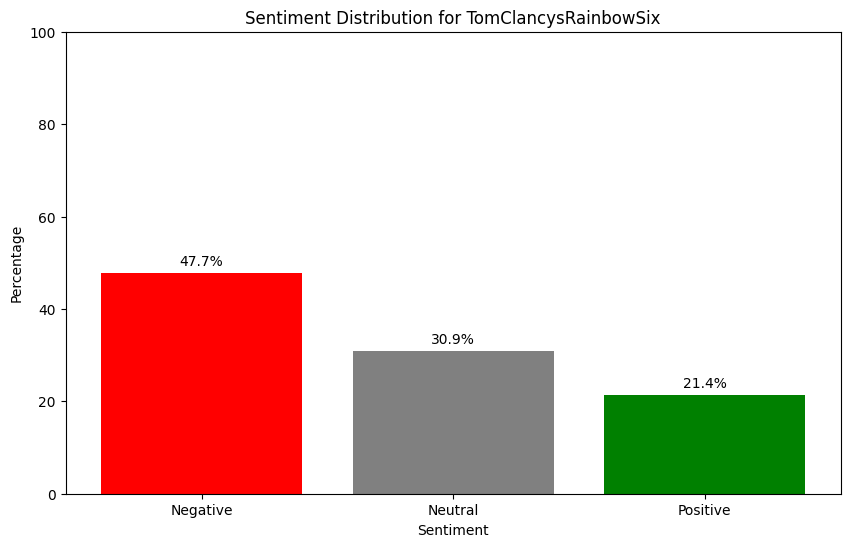

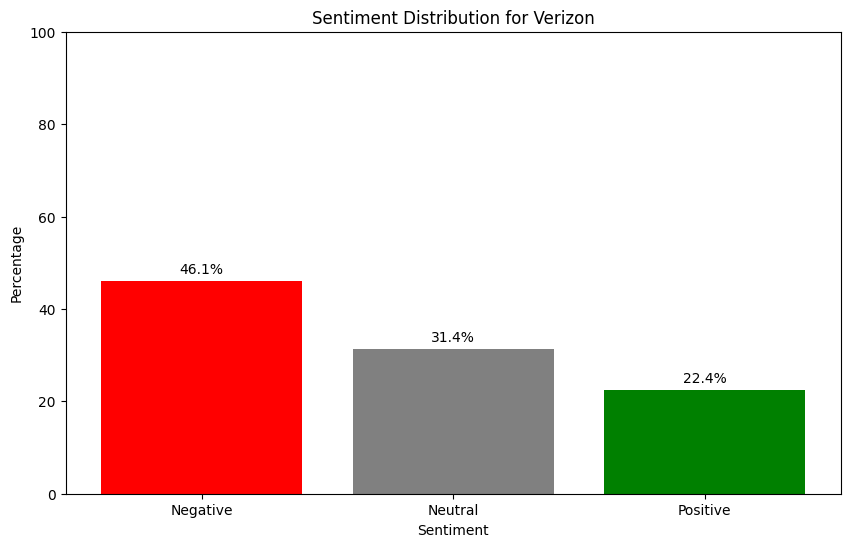

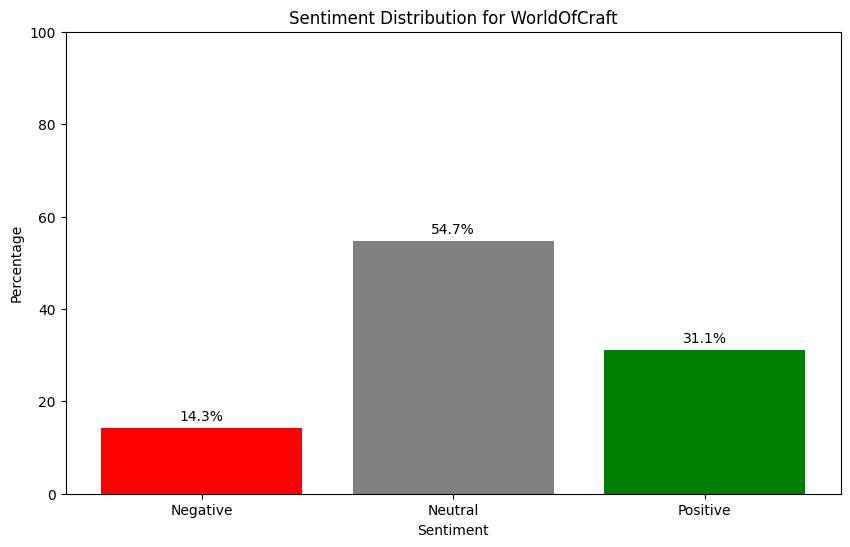

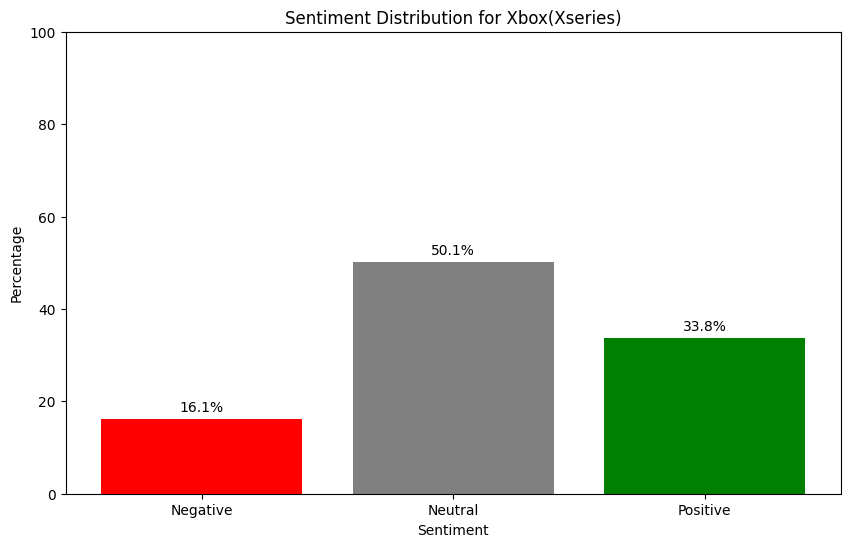

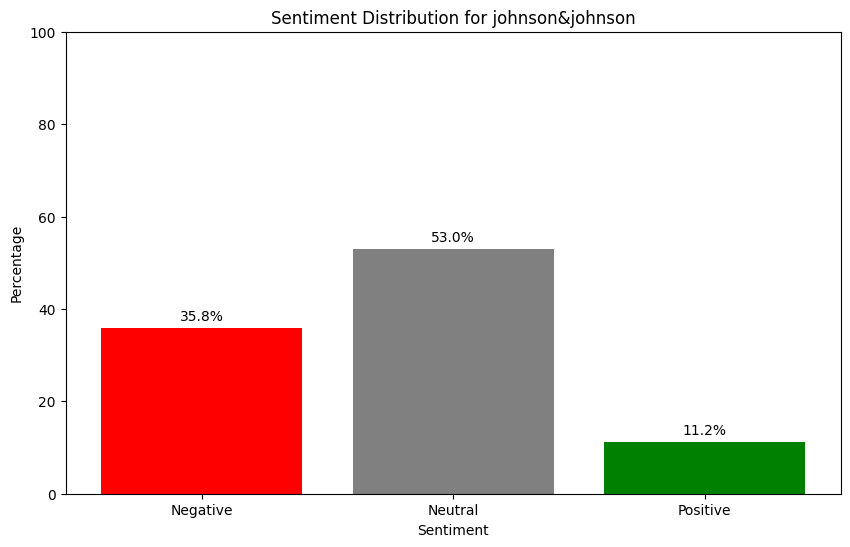

In [30]:
print('ranjith is a cool guy')

totals = sentiment_counts.sum(axis=1)
percentages = (sentiment_counts.divide(totals, axis=0) * 100).round(1)

for entity, row in percentages.iterrows():
    plt.figure(figsize=(10, 6))

    bars = plt.bar(row.index, row, color=['red', 'gray', 'green'])
    plt.title(f'Sentiment Distribution for {entity}')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

    plt.ylim(0, 100)  
    plt.show()